In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp



data=pd.read_csv("edu.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.shape

(1000, 8)

# ADDING EXTRA COLUMN(AVERAGE)

In [4]:
data['Average']=((data["math score"]+data["reading score"]+data["writing score"])/3).round()
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


# LABEL ENCODER

In [5]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data["gender"]=l.fit_transform(data["gender"])
data["race/ethnicity"]=l.fit_transform(data["race/ethnicity"])
data["parental level of education"]=l.fit_transform(data["parental level of education"])
data["lunch"]=l.fit_transform(data["lunch"])
data["test preparation course"]=l.fit_transform(data["test preparation course"])

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0


# VISUALIZATION

<AxesSubplot:ylabel='Frequency'>

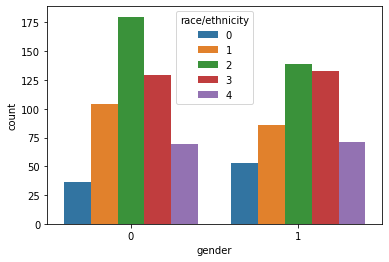

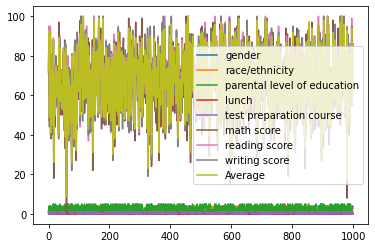

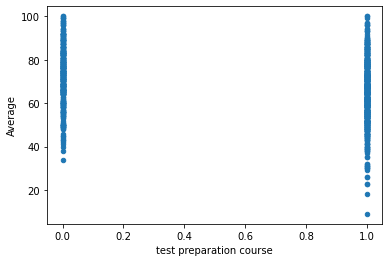

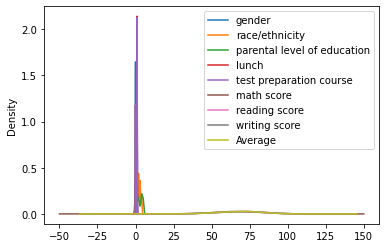

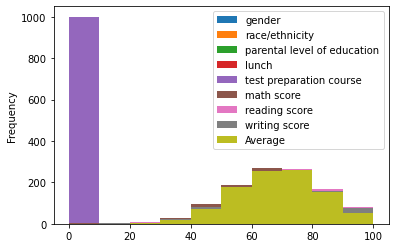

In [46]:
sb.countplot(data["gender"],hue=data["race/ethnicity"])
data.plot()
data.plot(kind="scatter",x="test preparation course",y="Average")
data.plot(kind="density")
data.plot(kind="hist")

# DATA PRE-PROCESSING

In [47]:
print(str("Any missing data or null in the dataset:"),data.isnull().values.any())
data.isnull().sum()

Any missing data or null in the dataset: False


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Average                        0
dtype: int64

In [6]:
data2=data.drop(columns=["lunch"])
data2.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,Average
0,0,1,1,1,72,72,74,73.0
1,0,2,4,0,69,90,88,82.0
2,0,1,3,1,90,95,93,93.0
3,1,0,0,1,47,57,44,49.0
4,1,2,4,1,76,78,75,76.0


In [49]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data2["gender"]=l.fit_transform(data2["gender"])
data2["race/ethnicity"]=l.fit_transform(data2["race/ethnicity"])
data2["parental level of education"]=l.fit_transform(data2["parental level of education"])
data2["test preparation course"]=l.fit_transform(data2["test preparation course"])

data2.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,Average
0,0,1,1,1,72,72,74,73.0
1,0,2,4,0,69,90,88,82.0
2,0,1,3,1,90,95,93,93.0
3,1,0,0,1,47,57,44,49.0
4,1,2,4,1,76,78,75,76.0


# PAIR PLOT

<Figure size 1440x720 with 0 Axes>

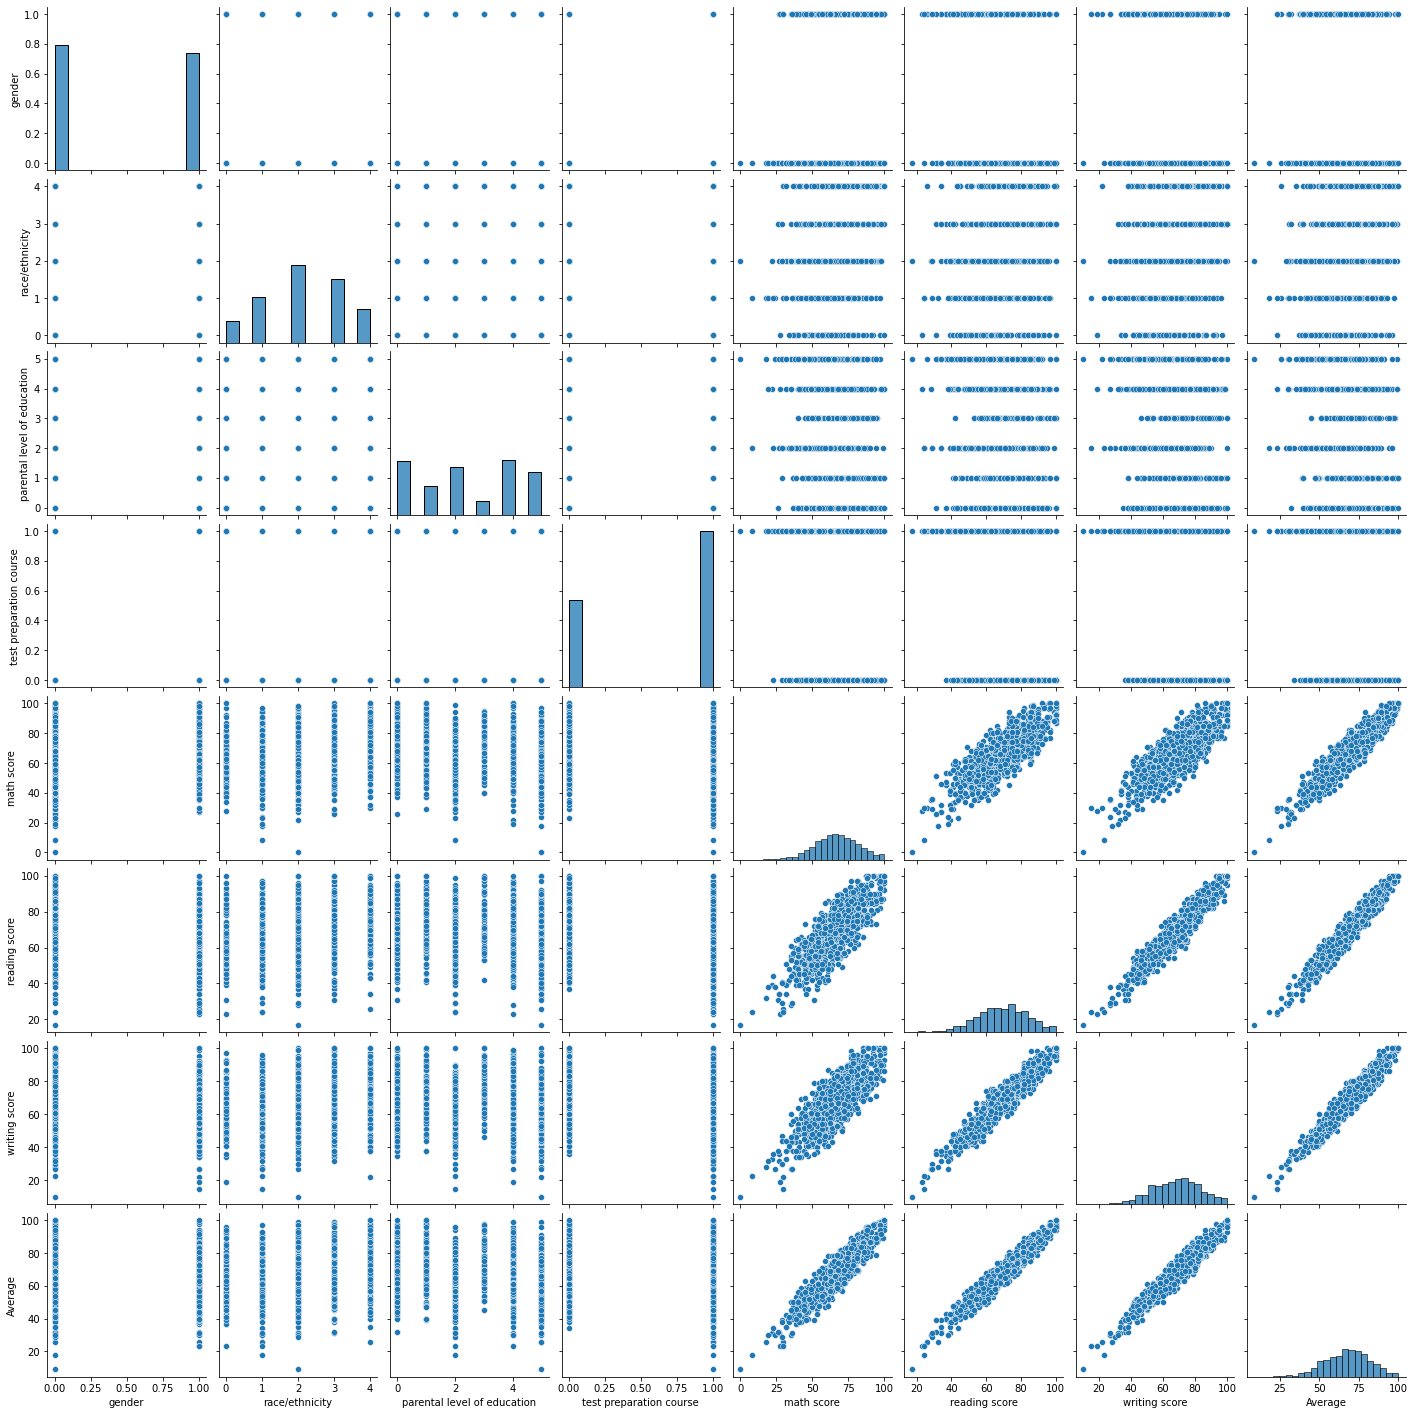

In [50]:
mp.figure(figsize=(20,10))
sb.pairplot(data2)

# OUTLIERS

<AxesSubplot:xlabel='math score'>

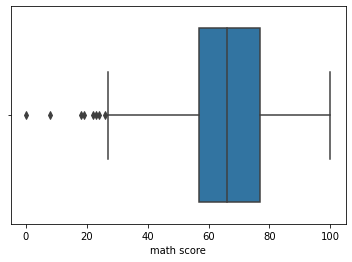

In [5]:
sb.boxplot(x=data2["math score"])

In [19]:
print(data2["math score"].quantile(0.10))
print(data2["math score"].quantile(0.90))

47.0
86.0


In [26]:
data2["math score"]=np.where(data2["math score"]<47.0,47.0,data2["math score"])
data2["math score"]=np.where(data2["math score"]>86.0,86.0,data2["math score"])
print(data2["math score"].skew())

0.004802837638950134


<AxesSubplot:xlabel='math score'>

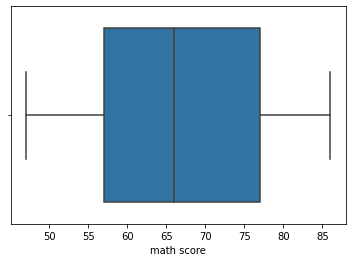

In [27]:
sb.boxplot(x=data2["math score"])

<AxesSubplot:xlabel='reading score'>

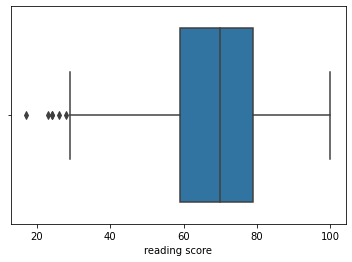

In [7]:
sb.boxplot(x=data2["reading score"])

In [7]:
print(data2["reading score"].quantile(0.10))
print(data2["reading score"].quantile(0.90))

51.0
87.10000000000002


In [8]:
data2["reading score"]=np.where(data2["reading score"]<51.0,51.0,data2["reading score"])
data2["reading score"]=np.where(data2["reading score"]>87.10000000000002,87.10000000000002,data2["reading score"])
print(data2["reading score"].skew())

-0.056271207575291346


<AxesSubplot:xlabel='reading score'>

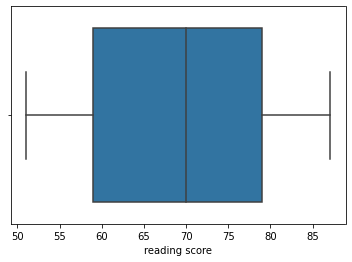

In [9]:
sb.boxplot(x=data2["reading score"])

<AxesSubplot:xlabel='writing score'>

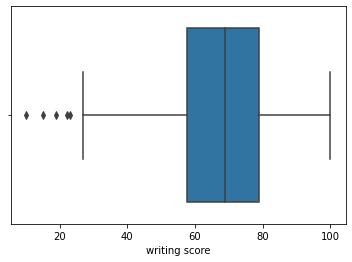

In [10]:
sb.boxplot(x=data2["writing score"])

In [11]:
print(data2["writing score"].quantile(0.10))
print(data2["writing score"].quantile(0.90))

48.0
87.0


In [12]:
data2["writing score"]=np.where(data2["writing score"]<48.0,48.0,data2["writing score"])
data2["writing score"]=np.where(data2["writing score"]>87.0,87.0,data2["writing score"])
print(data2["writing score"].skew())

-0.11981484588886816


<AxesSubplot:xlabel='writing score'>

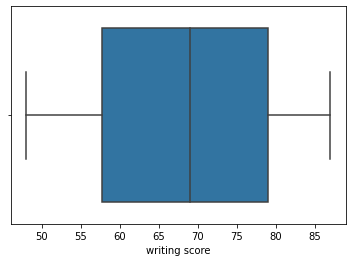

In [13]:
sb.boxplot(x=data2["writing score"])

# TRAINING AND TESTING MODEL

In [8]:
from sklearn.model_selection import train_test_split
y=data2["Average"]
x=data2.drop(["Average"],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
print("----------------TRAINING AND TESTING DATASETS-----------------")
print("x_train:",np.shape(x_train))
print("y_train:",np.shape(y_train))
print("x_test:",np.shape(x_test))
print("y_test:",np.shape(y_test))

----------------TRAINING AND TESTING DATASETS-----------------
x_train: (800, 7)
y_train: (800,)
x_test: (200, 7)
y_test: (200,)


# LINEAR REGRESSION

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train,y_train)
accuracies=cross_val_score(estimator = model,X = x_train,y=y_train,cv=10)
y_pred = model.predict(x_test)

print('Score : %.4f' % model.score(x_test,y_test))
print('Mean score: %0.3f' % accuracies.mean())

mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)**0.5
r2 = r2_score(y_test,y_pred)
print('------------------------------------------------------------')

print(' MSE : %0.2f ' % mse)
print(' RMSE : %0.2f ' % rmse)
print(' R2 : %0.2f ' % r2)

Score : 0.9996
Mean score: 1.000
------------------------------------------------------------
 MSE : 0.07 
 RMSE : 0.27 
 R2 : 1.00 


# SUPPORT VECTOR MACHINE(SVM)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
import warnings

warnings.filterwarnings("ignore")

x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.2)
svr = SVR()
accuracies = cross_val_score(svr,x_train,y_train,cv=20)
svr.fit(x_train,y_train)
#print(np.mean(accuracies))
print("ACCURACY:",svr.score(x_test,y_test))

ACCURACY: 0.9876080051098339
